In [68]:
import pandas as pd
import nltk
import re
import numpy as np
from textblob import TextBlob
import string
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
emails = pd.read_csv("../hillary_emails.csv")

In [69]:
def preprocess(sentence):
    sentence = sentence.lower()
    tokenizer = RegexpTokenizer(r'[a-z]+') # or just '\w+, this dumps numbers too
    tokens = tokenizer.tokenize(sentence)
    filtered_words = [w for w in tokens if not w in stopwords.words('english')]
    return " ".join(filtered_words)

emails.testBody = emails.ExtractedBodyText.apply(lambda x: str(x)).apply(lambda x: preprocess(x))

In [70]:
emails.testBody

0                                                     nan
1       b thursday march pm h latest syria aiding qadd...
2                                                     thx
3                                                     nan
4       h hrod clintonemail com friday march pm huma a...
5       pis print h hrod clintonernailcom wednesday se...
6                                                     nan
7       h hrod clintonemail corn friday march pm huma ...
8                                                     fyi
9       b wednesday september pm fwd libya libya sept ...
10                                                  fyi b
11      b wednesday september pm fwd libya libya sept ...
12                                                    fyi
13      anne marie slaughter sunday march pm jacob mil...
14      randolph lawrence m sent wednesday september p...
15      asked attend svtc today embassy tripoli first ...
16                           hope see picture kamala sent
17            

In [71]:
from textblob import TextBlob
tags_test = []
for x in range(10):
    tags_test.append(TextBlob(emails.testBody[x]).tags)

In [72]:
type(emails.ExtractedBodyText[1]) == str

True

In [73]:
# Floats cant be put through textblob, must convert to str (hashed line doesnt' work)
type(emails.ExtractedBodyText[0])
# blob = TextBlob(emails.ExtractedBodyText[0])
blob = TextBlob(str(emails.ExtractedBodyText[0]))
blob

TextBlob("nan")

In [74]:
# Some strings have weird unicode, must decode first
type(emails.ExtractedBodyText[5])
blob = TextBlob(emails.ExtractedBodyText[5].decode('utf-8'))
blob

TextBlob("Pis print.
-•-...-^
H < hrod17@clintonernailcom>
Wednesday, September 12, 2012 2:11 PM
°Russorv@state.gov'
Fw: Meet The Right-Wing Extremist Behind Anti-fvluslim Film That Sparked Deadly Riots
From [meat)
Sent: Wednesday, September 12, 2012 01:00 PM
To: 11
Subject: Meet The Right Wing Extremist Behind Anti-Muslim Film That Sparked Deadly Riots
htte/maxbiumenthal.com12012/09/meet-the-right-wing-extremist-behind-anti-musiim-tihn-that-sparked-
deadly-riots/
Sent from my Verizon Wireless 4G LTE DROID
U.S. Department of State
Case No. F-2015-04841
Doc No. C05739559
Date: 05/13/2015
STATE DEPT. - PRODUCED TO HOUSE SELECT BENGHAZI COMM.
SUBJECT TO AGREEMENT ON SENSITIVE INFORMATION & REDACTIONS. NO FOIA WAIVER. STATE-5CB0045251")

In [75]:
# Test how word_counts works
test = []
test.append(TextBlob(emails.ExtractedBodyText[1]).word_counts)
test.append(TextBlob(emails.ExtractedBodyText[2]).word_counts)
test

[defaultdict(int,
             {u'030311.docx': 2,
              u'2011': 2,
              u'3': 2,
              u'9:45': 1,
              u'aiding': 3,
              u'and': 1,
              u'b6': 1,
              u'for': 1,
              u'h': 1,
              u'hillary': 1,
              u'how': 1,
              u'hrc': 2,
              u'is': 1,
              u'latest': 1,
              u'libya': 2,
              u'march': 2,
              u'memo': 2,
              u'more': 1,
              u'pm': 1,
              u'qaddafi': 1,
              u'sid': 1,
              u'syria': 3,
              u'thursday': 1}),
 defaultdict(int, {u'thx': 1})]

In [76]:
# make blobs and sentiments
blobs = []
sentiments = []
count_dict = []
for x in range(len(emails.ExtractedBodyText)):
    if type(emails.ExtractedBodyText[x]) != float:
        content = emails.ExtractedBodyText[x].decode('utf-8')
    else:
        content = str(emails.ExtractedBodyText[x])
    blob = TextBlob(content)
    blobs.append(blob)
    count_dict.append(blob.word_counts)
    sentiments.append(blob.sentiment.polarity)

In [77]:
# add sentiment and blob columns
emails['sentiments'] = sentiments
emails['blobs'] = blobs
emails['count_dict'] = count_dict

In [39]:
# test column
emails.blobs[0]

TextBlob("nan")

In [38]:
# test blob function in column
emails.blobs[0].tags

[('nan', u'NN')]

In [37]:
# test count_dict column
emails.count_dict[0]

defaultdict(int, {u'nan': 1})

In [40]:
emails.to_csv('emails_sentiment.csv')

In [3]:
emails = pd.read_csv('emails_sentiment.csv')

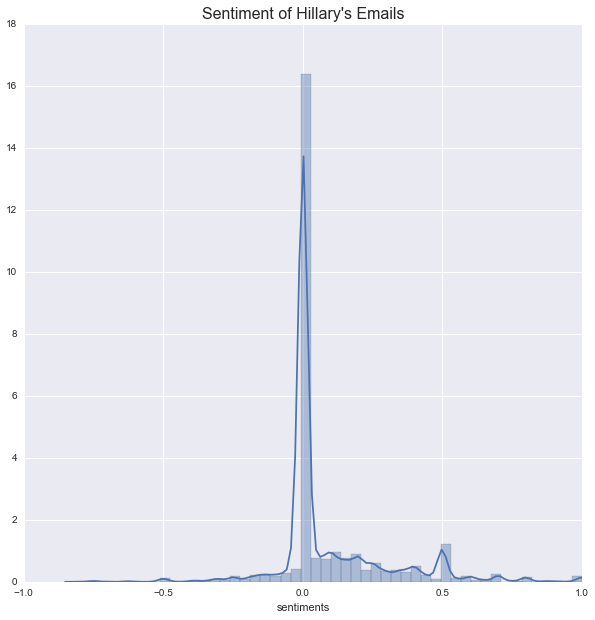

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10, 10))

sns.distplot(emails.sentiments)
plt.xlim(-1,1)
plt.title('Sentiment of Hillary\'s Emails', fontsize = 16)

In [8]:
# Emails that don't have sentiment = 0
len(emails[(emails.sentiments > 0) | (emails.sentiments < 0)])

3375

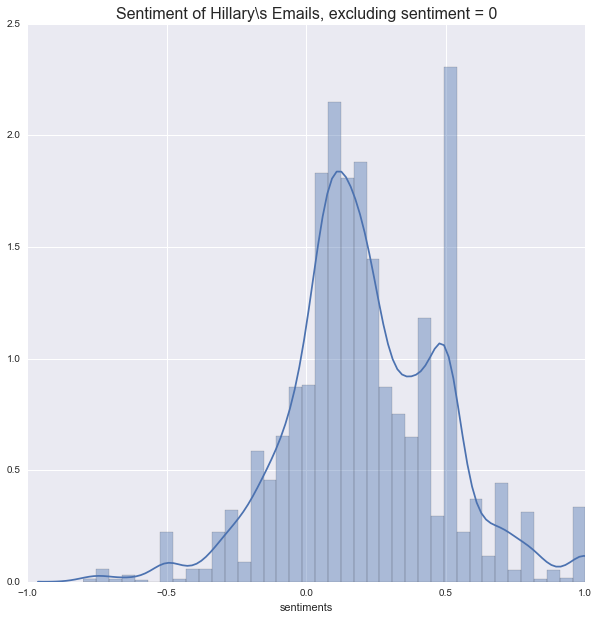

In [9]:
plt.figure(figsize=(10, 10))

sns.distplot(emails[(emails.sentiments > 0) | (emails.sentiments < 0)].sentiments)
plt.xlim(-1,1)
plt.title('Sentiment of Hillary\s Emails, excluding sentiment = 0', fontsize = 16)

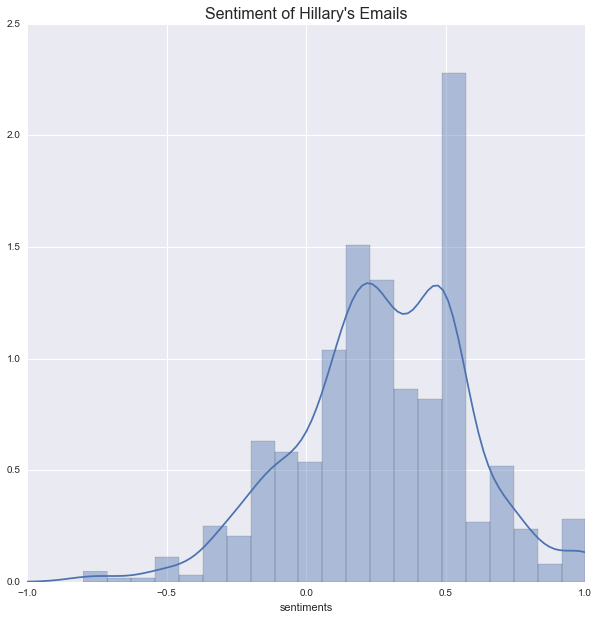

In [95]:
plt.figure(figsize=(10,10))
sns.distplot(emails[((emails.sentiments > 0) | (emails.sentiments < 0)) &
                   emails.MetadataFrom.str.contains('^H$')].sentiments)
# sns.distplot(emails[emails.MetadataFrom.str.contains('^H$')].sentiments)
plt.xlim(-1,1)

plt.title('Sentiment of Hillary\'s Emails', fontsize = 16)

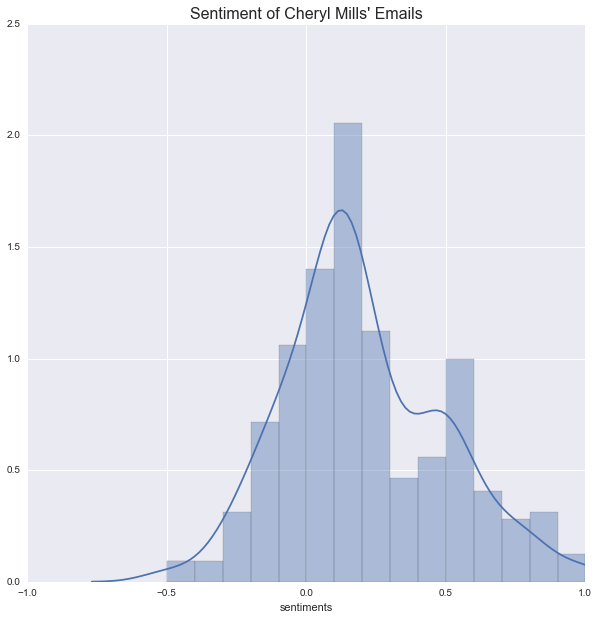

In [100]:
plt.figure(figsize=(10,10))
sns.distplot(emails[((emails.sentiments > 0) | (emails.sentiments < 0)) &
                   emails.MetadataFrom.str.contains('Mills')].sentiments)
# sns.distplot(emails[emails.MetadataFrom.str.contains('^H$')].sentiments)
plt.xlim(-1,1)

plt.title('Sentiment of Cheryl Mills\' Emails', fontsize = 16)

In [91]:
# test = emails.groupby('MetadataFrom')
# print test.count
# print test.sentiments.aggregate(np.mean)

# emails.MetadataFrom = emails.MetadataFrom.apply(lambda x: str(x))
# print np.mean(emails[emails.MetadataFrom.str.contains('^H$')].sentiments)
# print np.mean(emails[emails.MetadataFrom.str.contains('Mills')].sentiments)
# print np.mean(emails[emails.MetadataFrom.str.contains('Blumenthal')].sentiments)
# print np.mean(emails[emails.MetadataFrom.str.contains('Sullivan')].sentiments)

<bound method DataFrameGroupBy.count of <pandas.core.groupby.DataFrameGroupBy object at 0x1271c7190>>
MetadataFrom
111th Congress                   0.000000
AF/PDPA:Scott, Marianne          0.000000
AGNA USEMB Kabul Afghanistan     0.000000
AP                               0.000000
Abedin, Huma                     0.053957
AbedinH@state.gov                0.046542
Abein, Huma                      0.000000
Abendin, Huma                    0.000000
Adedin, Huma                     0.000000
Adler, Caroline E                0.175000
Albright, M K                    0.380000
Albright, Madeleine              0.500000
Alec                             0.000000
American Beverage Association    0.000000
Axelrod, David M                 0.437500
BAM@Mikulski.senate.gov          0.466667
BLAIR CHERIE                    -0.500000
Baer, Daniel                     0.199470
Baer, Daniel B                   0.000000
Baer, Daniel D                   0.000000
BaldersonKM@state.gov            0.000000
Bal